# Investigate Titanic Dataset

### Overview

The sinking of the RMS Titanic occurred on the night of 14 April through to the morning of 15 April 1912 in the North Atlantic Ocean. It was one of the deadliest peacetime maritime disasters in history.

In this project, we will investigate a subset of the RMS Titanic passenger list to determine which features(age, gender, socio-economic status, etc.) help to predict whether someone survived or died.

You can check out the Kaggle Titanic Challenge link [here](https://www.kaggle.com/c/titanic-gettingStarted)

### Investigating the Data

Below is the Titanic data description from Kaggle site:

In [284]:
#VARIABLE DESCRIPTIONS:
#
#survival        Survival
#                (0 = No; 1 = Yes)
#pclass          Passenger Class
#                (1 = 1st; 2 = 2nd; 3 = 3rd)
#name            Name
#sex             Sex
#age             Age
#sibsp           Number of Siblings/Spouses Aboard
#parch           Number of Parents/Children Aboard
#ticket          Ticket Number
#fare            Passenger Fare
#cabin           Cabin
#embarked        Port of Embarkation
#                (C = Cherbourg; Q = Queenstown; S = Southampton)
#
#SPECIAL NOTES:
#Pclass is a proxy for socio-economic status (SES)
# 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
#
#Age is in Years; Fractional if Age less than One (1)
# If the Age is Estimated, it is in the form xx.5
#
#With respect to the family relation variables (i.e. sibsp and parch)
#some relations were ignored.  The following are the definitions used
#for sibsp and parch.
#
#Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
#Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
#Parent:   Mother or Father of Passenger Aboard Titanic
#Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic
#
#
#Other family relatives excluded from this study include cousins,
#nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
#only with a nanny, therefore parch=0 for them.  As well, some
#travelled with very close friends or neighbors in a village, however,
#the definitions do not support such relations.


<i>Download the train.csv file form Kaggle site, and put it to the same folder with your Jupyter Notebook folder.</i>

In [285]:
# Import libraries
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
#sns.set_style("darkgrid")

# Read the csv file to a DataFrame
titanic_df = pd.read_csv("train.csv")

# A preview of the data
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [286]:
# The dimensions (row size, column size) of the dataframe
titanic_df.shape

(891, 12)

In [287]:
# Overall info for dataframe
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [288]:
# Describing the data frame help us to find min, max, mean easily for columns.
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<i>We see that Age, Cabin and Embarked columns have some null values. We have to remember that for further analysis.</i>

In [289]:
# See the columns again
titanic_df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [290]:
# Lower the column names to remember easily
titanic_df.rename(columns = lambda x: x.lower(), inplace=True)
titanic_df.columns

Index([u'passengerid', u'survived', u'pclass', u'name', u'sex', u'age',
       u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked'],
      dtype='object')

In [291]:
# First let's start with the numbers who survived and who didn't.
titanic_df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

<i>We can see from the above numbers that 549 of 891 passengers died, and 342 of them survived. Let's see this on a graph.</i>

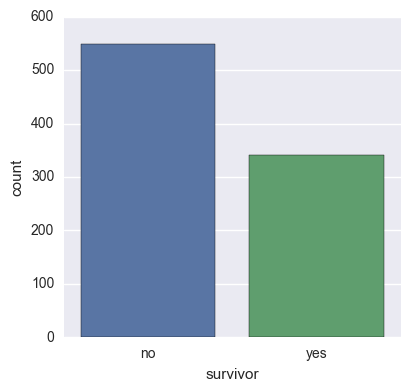

In [292]:
# Create a new column for showing survival
titanic_df["survivor"] = titanic_df.survived.map({0: "no", 1: "yes"})

sns.factorplot('survivor', kind="count", data=titanic_df)

In [293]:
# and the survival percentages
titanic_df.survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

<i>62% of the passengers died, and 38% of them survived.

We will check the gender now. 
</i>
                      

In [294]:
titanic_df["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

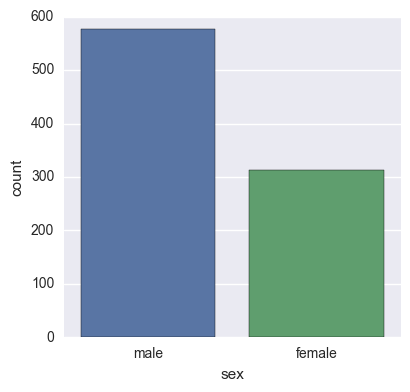

In [295]:
sns.factorplot('sex', kind="count", data=titanic_df)

In [296]:
# the gender percentages
titanic_df.sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: sex, dtype: float64

In [297]:
# Now we will check gender and survival together
gender_crosstab = pd.crosstab(titanic_df.sex, titanic_df.survived)

gender_crosstab

survived,0,1
sex,,
female,81,233
male,468,109


In [298]:
# gender and survival percentages
gender_pct = gender_crosstab.div(gender_crosstab.sum(1).astype(float) , axis=0)

gender_pct

survived,0,1
sex,,
female,0.257962,0.742038
male,0.811092,0.188908


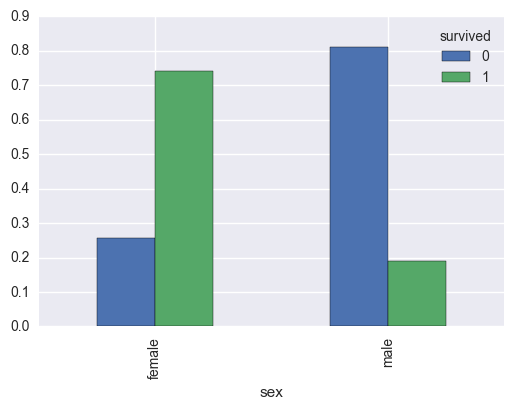

In [299]:
# Let's see gender and survival on a graph together
gender_pct.plot(kind="bar")

<i>We can see from the graph that most of the women(74%) survived and most of the men (81%) died. 

But we should take care of children, so we will write a helper function.

We will add a new column  to the dataframe called "Person", to distinguish male, female and child.

Let's treat anyone under 14 as a child.</i>

In [300]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 14:
        return 'child'
    else:
       return sex


# the new Person column
titanic_df['person'] = titanic_df[['age','sex']].apply(male_female_child, axis=1)
    

In [301]:
# Check the new column
titanic_df[0:10]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survivor,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,no,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,yes,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,yes,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,no,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,no,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,no,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,yes,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,yes,female


<i>This Person column is important to differentiate people as male, female, child.</i>



In [302]:

titanic_df["person"].value_counts()

male      540
female    280
child      71
Name: person, dtype: int64

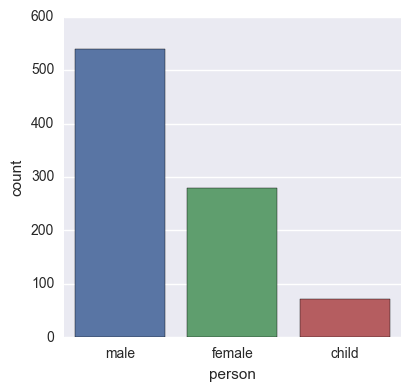

In [303]:
sns.factorplot('person', kind="count", data=titanic_df)

In [304]:
# the person percentages
titanic_df.person.value_counts(normalize=True)

male      0.606061
female    0.314254
child     0.079686
Name: person, dtype: float64

In [305]:
# Now we will check person and survival together 
person_crosstab = pd.crosstab(titanic_df.person, titanic_df.survived)

person_crosstab

survived,0,1
person,,
child,29,42
female,68,212
male,452,88


In [306]:
# person and survival percentages
person_pct = person_crosstab.div(person_crosstab.sum(1).astype(float) , axis=0)

person_pct

survived,0,1
person,,
child,0.408451,0.591549
female,0.242857,0.757143
male,0.837037,0.162963


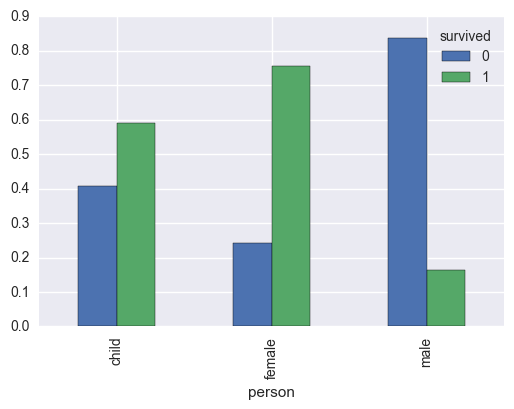

In [307]:
# Let's see gender and survival on a graph together
person_pct.plot(kind="bar")

<i>The above numbers and graph shows us that 76% of the female passengers and 59% of the child passengers survived. 
Only 16% of the male passengers succeeded to survive.

This numbers show us that "Women and children first!" policy was followed on the ship.

Now, let's investigate the passenger class.</i>

In [308]:
# Now we will check passenger class and survival
pclass_crosstab = pd.crosstab(titanic_df.pclass, titanic_df.survived)

pclass_crosstab

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


In [309]:
# passenger class and survival percentages
pclass_pct = pclass_crosstab.div(pclass_crosstab.sum(1).astype(float) , axis=0)

pclass_pct

survived,0,1
pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


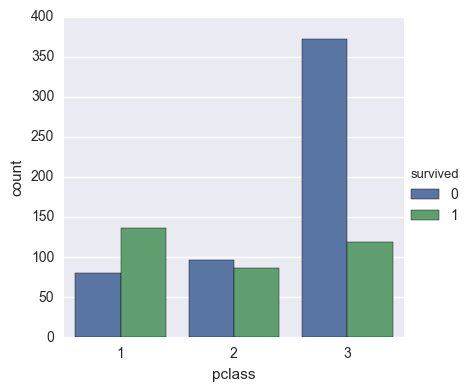

In [310]:
sns.factorplot('pclass', kind='count', data=titanic_df, hue='survived')

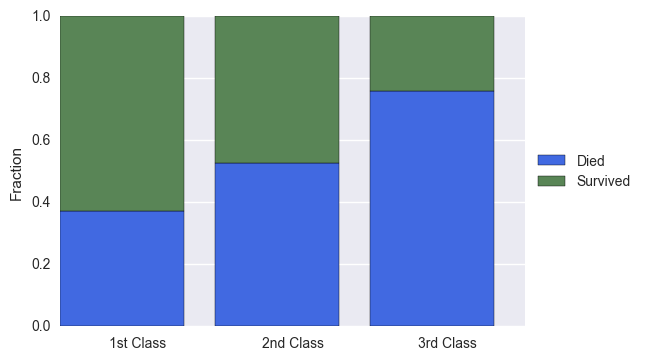

In [311]:
pclass_crosstab = pclass_crosstab.apply(lambda x: x/x.sum(), axis=1)
plt.bar([0,1,2], pclass_crosstab[0], color="royalblue", label="Died")
plt.bar([0,1,2], pclass_crosstab[1], bottom=pclass_crosstab[0], color="darksage", label="Survived")
plt.xticks([0.5, 1.5, 2.5], ["1st Class", "2nd Class", "3rd Class"], rotation="horizontal" )
plt.ylabel("Fraction")
plt.xlabel("")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

<i>The numbers and graph above shows us 63% of the 1st class passengers survived, against 24% of the 3rd class passengers survived.

We can say that, being a 1st class passenger boosted change to survive on Titanic.</i>

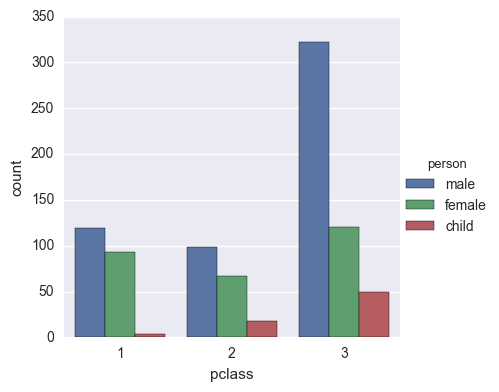

In [312]:
# Let's look at the passenger class info with our person column
sns.factorplot('pclass', kind='count', data=titanic_df, hue='person')

<i>1st class almost had no children, most of the children were the 3rd class passengers.

Let's see the ages of the passengers on a histogram.</i>

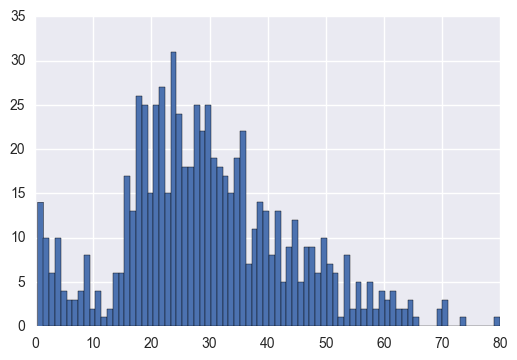

In [313]:
titanic_df['age'].hist(bins=80)

[(0, 80.0)]

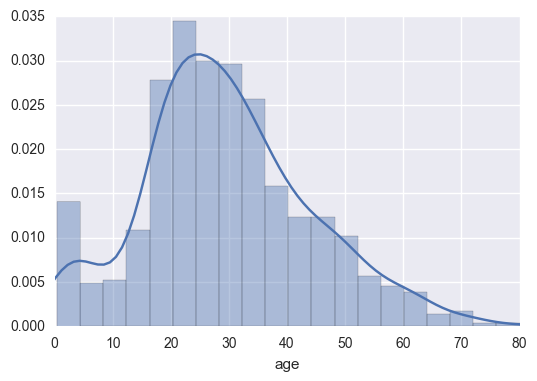

In [314]:
# A line over histogram would help us to visualize.
fig = sns.distplot(titanic_df["age"].dropna())

# max limit is the oldest person
oldest = titanic_df['age'].max()

#lower limit at 0
fig.set(xlim=(0,oldest))


In [315]:
# Here are the numbers for person and class
perclass_crosstab = pd.crosstab(titanic_df.person, titanic_df.pclass)

perclass_crosstab

pclass,1,2,3
person,,,
child,4,18,49
female,93,67,120
male,119,99,322


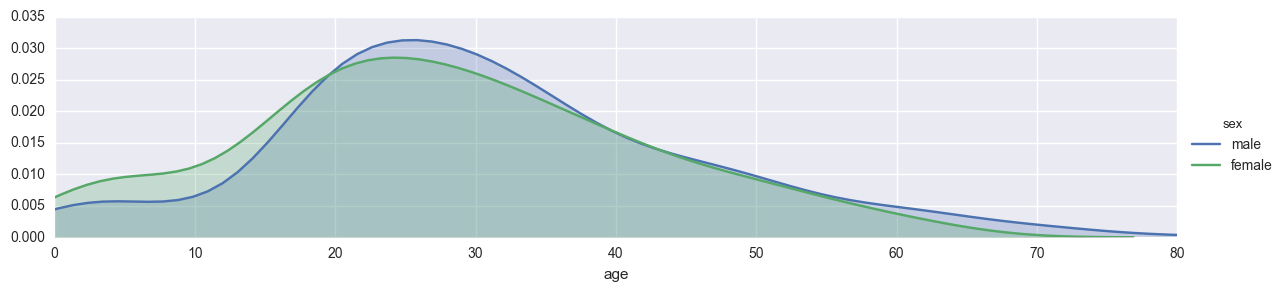

In [316]:
#Let's see distribution of ages grouped by gender with kde plot.
fig = sns.FacetGrid(titanic_df, hue="sex",aspect=4)
fig.map(sns.kdeplot,'age',shade= True)
oldest = titanic_df['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

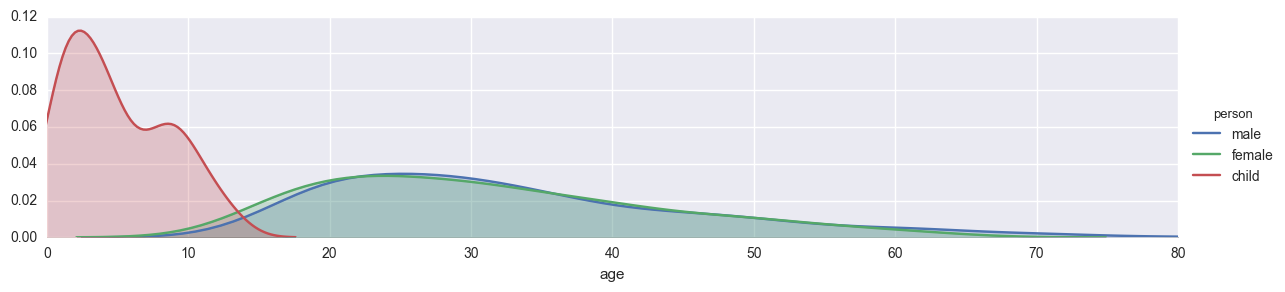

In [317]:
#distribution of ages grouped by person with kde plot.
fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'age',shade= True)
oldest = titanic_df['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

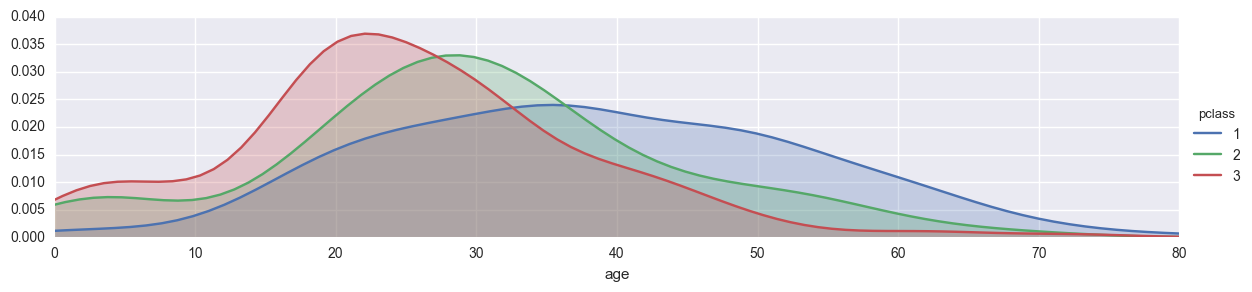

In [318]:
#distribution of ages grouped by class with kde plot.
fig = sns.FacetGrid(titanic_df, hue="pclass",aspect=4)
fig.map(sns.kdeplot,'age',shade= True)
oldest = titanic_df['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

<i>It looks like 1st class passengers are older, and 3rd class passengers are younger.</i>

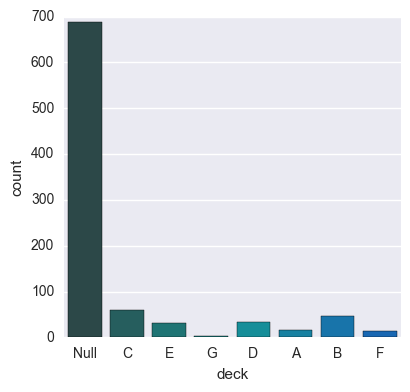

In [319]:
titanic_df["deck"] = titanic_df.cabin.str[0].map(lambda s: np.nan if s == "T" else s)
titanic_df["deck"].fillna('Null', inplace=True)


sns.factorplot('deck',data=titanic_df, kind='count', palette='winter_d')

In [320]:
# Now we will check gender and survival together
deck_crosstab = pd.crosstab(titanic_df.deck, titanic_df.survived)

deck_crosstab

survived,0,1
deck,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
Null,482,206


<i>Cabin column has lots of null values, so it is difficult to relate deck info to surviving.</i>

In [321]:
# Now we will check port and survival together
# (C = Cherbourg; Q = Queenstown; S = Southampton)
port_crosstab = pd.crosstab(titanic_df.embarked, titanic_df.survived)

port_crosstab

survived,0,1
embarked,,
C,75,93
Q,47,30
S,427,217


In [322]:
# port of embarkation and survival percentages
port_pct = port_crosstab.div(port_crosstab.sum(1).astype(float) , axis=0)

port_pct

survived,0,1
embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


<i>Cherbourg port's survival rate looks higher. Let's check it with passenger class.</i>

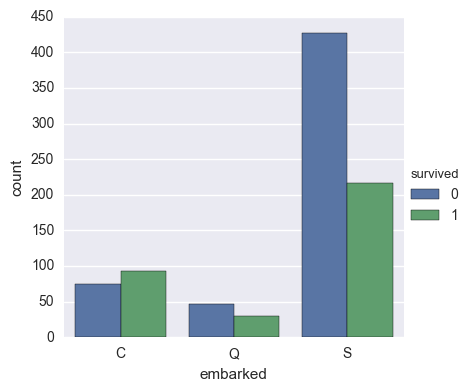

In [323]:
sns.factorplot('embarked',data=titanic_df, hue='survived', kind='count', x_order=['C','Q','S'])

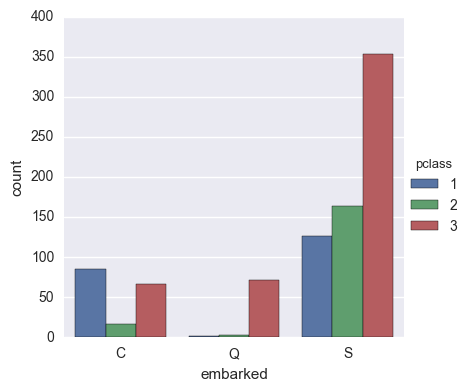

In [324]:
sns.factorplot('embarked',data=titanic_df,hue='pclass', kind='count', x_order=['C','Q','S'])

<i>Yes, almost half of the passengers of Cherbourg port were 1st class. Other ports passengers boarded were mostly 3rd class. Especially almost all of the Queenstown's passengers were 3rd class.</i>

<i>And now we will check being alone or being with family is related with the survival change.</i>

In [325]:
# Let's start by adding a new column to define aloneval

# We'll add the parent/child column with the sibsp column
titanic_df['aloneval'] =  titanic_df.parch + titanic_df.sibsp
titanic_df['aloneval'].head()

0    1
1    1
2    0
3    1
4    0
Name: aloneval, dtype: int64

In [326]:
# if aloneval>0 the alone is 'With Family', if aloneval==0 the alone is 'Alone'
titanic_df['alone'] = ''
titanic_df['alone'].loc[titanic_df['aloneval'] > 0] = 'With Family'
titanic_df['alone'].loc[titanic_df['aloneval'] == 0] = 'Alone'

titanic_df[0:10]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survivor,person,deck,aloneval,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,no,male,Null,1,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,yes,female,C,1,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes,female,Null,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,yes,female,C,1,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no,male,Null,0,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,no,male,Null,0,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,no,male,E,0,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,no,child,Null,4,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,yes,female,Null,2,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,yes,female,Null,1,With Family


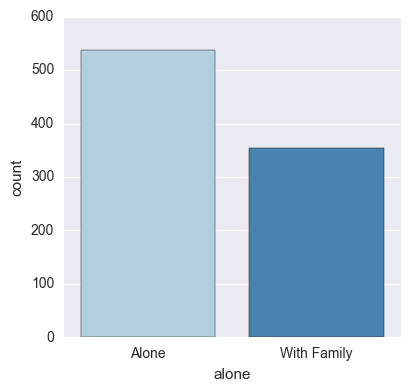

In [327]:
# Now let's see how many passengers were alone, and how many were with family on a visual graph.
sns.factorplot('alone',data=titanic_df, kind='count', palette='Blues', x_order=['Alone','With Family'])

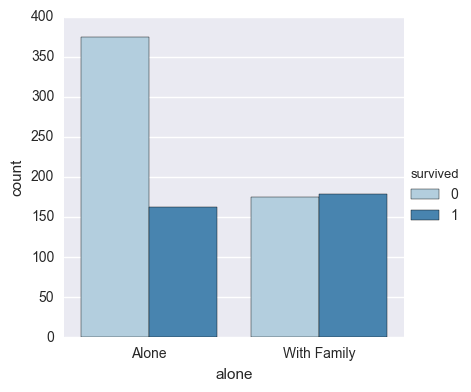

In [328]:
sns.factorplot('alone',data=titanic_df, hue='survived', kind='count', palette='Blues', x_order=['Alone','With Family'])

<i>Interesting. Looks like survival chance for passengers who were with their family is higher.</i>

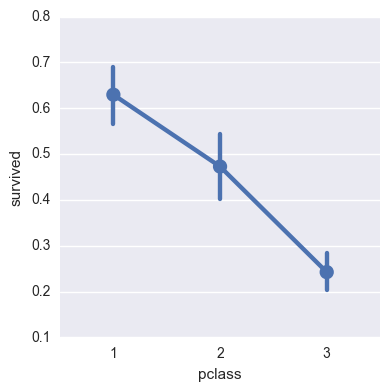

In [329]:
# Let's check the effect of the class of the passengers on survival rate.
sns.factorplot('pclass','survived',data=titanic_df)

It is obviously clear that survival rate for the 3rd class passengers is lower. But we must see the genders to be sure, maybe all men were in the 3rd class, and all women and children were in the other classes.

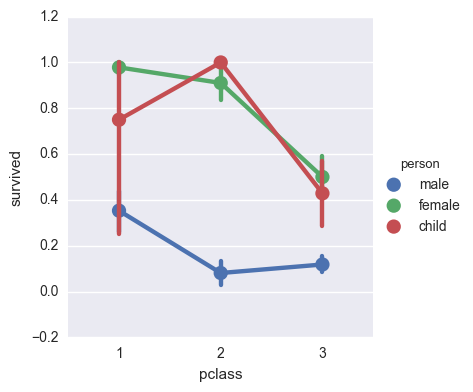

In [330]:
# Let's check class, survived, person together.
sns.factorplot('pclass','survived',hue='person', data=titanic_df)

<i>No, being in the 3rd class were not favourable for both male, female and child. And as seen on the visual, being a male in any class decreases your chance of survival.</i>

<i>And age, did age had an effect on survival rate?</i>

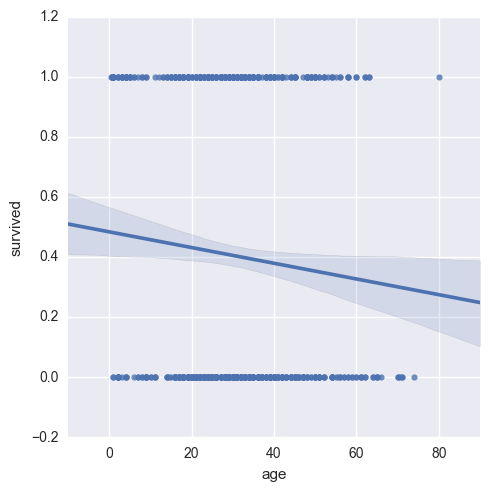

In [333]:
# Let's use a linear plot on age versus survival
sns.lmplot('age','survived',data=titanic_df)

Looks like survival rate for older passengers were lower. Let's add class info to this graph with hue.

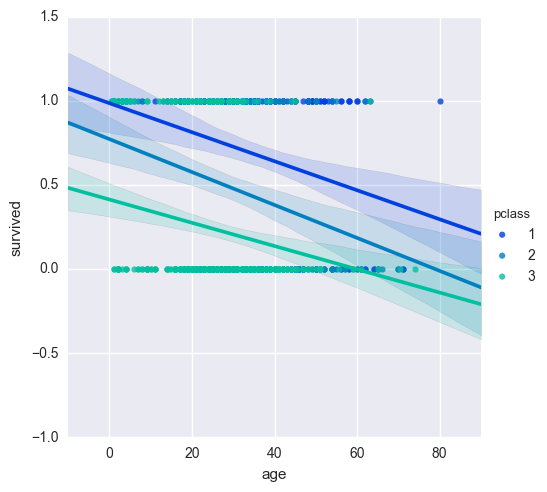

In [334]:
sns.lmplot('age','survived',hue='pclass',data=titanic_df,palette='winter')

<i>We see that, older passenger's chances decreases for both classes but being in the 1st class had an adventage.</i>

Now let's put gender instead of class info on the same graph.

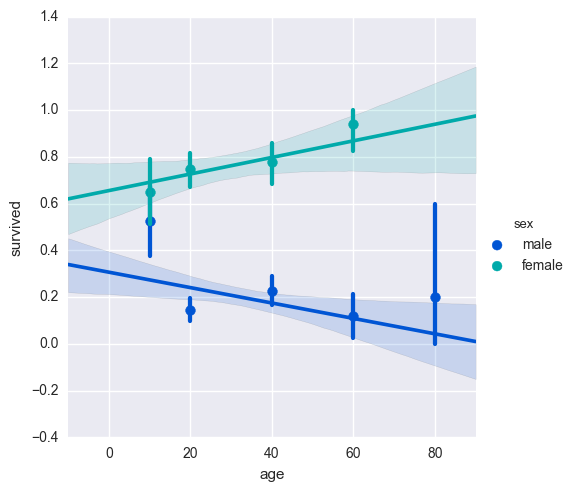

In [335]:
sns.lmplot('age','survived',hue='sex',data=titanic_df,palette='winter',x_bins=generations)

<i>Interesting result! If you were female, being older increased your chance for survival. But if you were male, being older decreased your change for survival.</i>

<i>Below is a good picture to understand the layout of the Titanic ship</i>

In [336]:
from IPython.display import Image
Image(url='http://1.bp.blogspot.com/-E4r73C2lSyw/UFDGu4_9jBI/AAAAAAAAANc/ao7fY_fLotQ/s1600/TITANIC.jpg')

### Conclusion

In this project, we investigated a subset of the RMS Titanic passenger list to determine which features(age, gender, socio-economic status, etc.) helped to predict whether someone survived or died.

And as a result, we can say that passengers with the following characteristics are more likely to survive:
<ul>
   <li>Female</li>
   <li>Child</li>
   <li>1st or 2nd class</li>
   <li>Older(for female)</li>
   <li>Younger(for male)</li>
   <li>Port of Embarkation(Cherbourg)</li>
</ul>

This conclusion relies on only a subset of the passengers list (891 of 1317). No serious inference can be made on this report, because it is an observational data and we have no information about the randomness.

#### References

<ul>
   <li><a href="https://www.kaggle.com/c/titanic/kernels">Kaggle Titanic Competitions</a></li>
   <li><a href="https://www.udemy.com/learning-python-for-data-analysis-and-visualization/learn/v4/content">Udemy Learning Python for Data Analysis and Visualization</a></li>
</ul>